# Time Series ARIMAX Modeling

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

housing_data = pd.read_csv("/content/drive/MyDrive/Datasets/real-estate-time.csv")

housing_prices = pd.DataFrame(housing_data[['saledate','MA']][:200])
housing_prices.plot()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Datasets/real-estate-time.csv'

In [ ]:
from statsmodels.tsa.stattools import adfuller

p = adfuller(housing_prices['MA'])[0]
p

-0.26486758369979035

<Axes: >

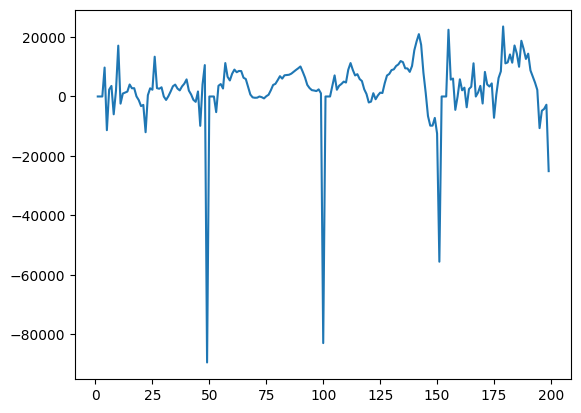

In [ ]:
housing_diff = housing_prices['MA']-housing_prices['MA'].shift(1)
housing_diff.plot()


autocorrelations to know the p values to pick for the ARIMA model."

<Axes: >

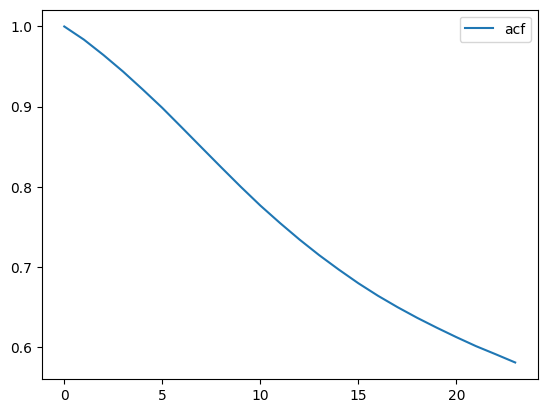

In [ ]:
from statsmodels.tsa.stattools import acf
pd.DataFrame(acf(housing_prices['MA']), columns=['acf']).plot()

Let's fit and predict on the series with the original ARIMA model.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


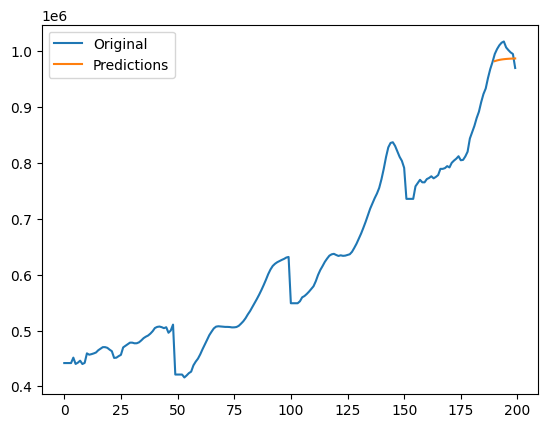

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(housing_prices['MA'][:-10], order=(1,1,1))
arima_model_fit = arima_model.fit()
fit_preds = arima_model_fit.predict(len(housing_prices)-10, len(housing_prices)-1)

housing_prices['MA'].plot()
fit_preds.plot()
plt.legend(['Original','Predictions'])

<Axes: >

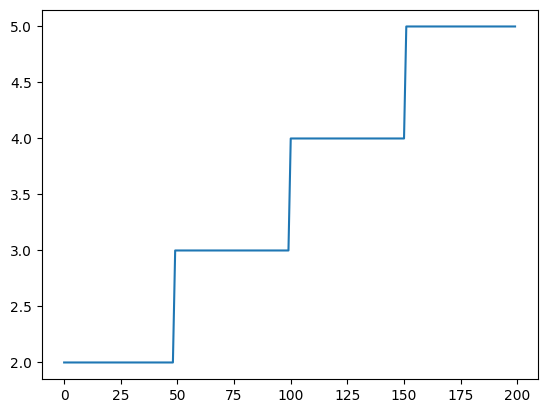

In [ ]:
housing_beds = housing_data[['saledate','bedrooms']][:200]
housing_beds['bedrooms'].plot()

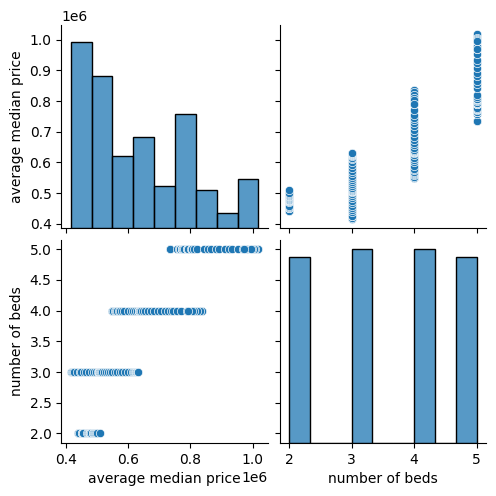

In [ ]:
import seaborn as sns
sns.pairplot(data=pd.DataFrame(data={'average median price':housing_prices['MA'],
                                     'number of beds':housing_beds['bedrooms']}))

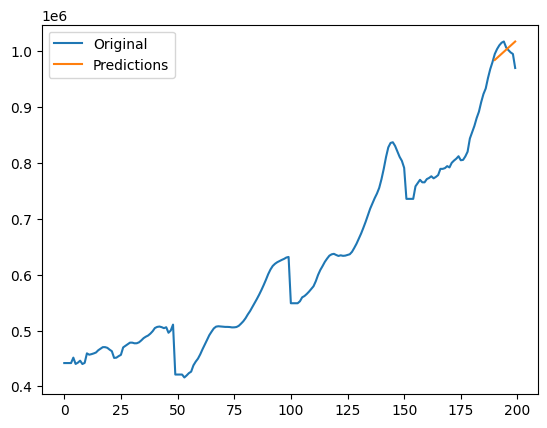

In [ ]:
arima_model_2 = ARIMA(endog=housing_prices['MA'][:-10], exog=housing_beds['bedrooms'][:-10],
                      order=(1,1,1)) #autoregressive term,differencing operation,moving average term.
arima_model_fit_2 = arima_model_2.fit()
fit_preds_2 = arima_model_fit_2.predict(len(housing_prices)-10, len(housing_prices)-1,
                                       exog=housing_beds['bedrooms'][-10:])

housing_prices['MA'].plot()
fit_preds_2.plot()
plt.legend(['Original','Predictions'])

# CNN

In [ ]:
# Importing library
from numpy import array
from tensorflow.keras.models import Sequential # Changed import statement
from tensorflow.keras.layers import Dense  # Changed import statement
from tensorflow.keras.layers import Flatten # Changed import statement
from tensorflow.keras.layers import Conv1D # Changed import statement
from tensorflow.keras.layers import MaxPooling1D # Changed import statement
import pandas as pd


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Datasets/real-estate-time.csv')
x_input=data['MA'].tolist()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Datasets/real-estate-time.csv'

In [ ]:
data.head()

 split_sequence, is designed to take a sequence (like a list or an array) and split it into input-output pairs for a supervised learning task. The steps parameter defines the number of time steps to include in each input sequence (X), while the output (y) is the next value in the sequence following the input.

In [ ]:
def split_sequence(sequence,steps):
  X,y = list() , list()
  for start in range(len(sequence)):
    end_index = start + steps
    if end_index > len(sequence)-1:
      break
    X_seq , y_seq = sequence[start:end_index],sequence[end_index]
    X.append(X_seq)
    y.append(y_seq)
  return array(X) , array(y)

In [ ]:
raw_sequence = [100+10*i for i in range(10)]
raw_sequence

[100, 110, 120, 130, 140, 150, 160, 170, 180, 190]

In [ ]:
raw_sequence = [100+10*i for i in range(10)]
raw_sequence

[100, 110, 120, 130, 140, 150, 160, 170, 180, 190]

In [ ]:
steps = 3
X,y = split_sequence(x_input,steps)

NameError: name 'x_input' is not defined

In [ ]:
features = 1
X = X.reshape((X.shape[0],X.shape[1],features))

NameError: name 'X' is not defined

In [ ]:
#CNN Model architecture
model = Sequential()
model.add(Conv1D(filters=64,kernel_size=2,activation='relu',input_shape=(steps,features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse', metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(X,y,epochs=10,verbose=1)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - loss: 202570399744.0000
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 56207253504.0000  
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 5731203584.0000 
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 9905682432.0000  
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 4488166912.0000
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 1863883520.0000
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 1436832512.0000
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 787760320.0000 
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 2615814400.0000
Epoch 10/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 3263741696.0000 


In [ ]:
x_input = array([461,390,432])
x_input = x_input.reshape((1,steps,features))
y_pred = model.predict(x_input, verbose=0)
y_pred

array([[422.68015]], dtype=float32)